Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

In machine learning algorithms, kernel functions and polynomial functions are related in the context of feature transformation, particularly when using the kernel trick.
1.
Kernel Functions:

Kernel functions are used in various machine learning algorithms, including Support Vector Machines (SVMs), to implicitly map data points into a higher-dimensional space without explicitly calculating the mapped feature vectors.

Kernel functions compute the dot product (inner product) between these implicitly mapped feature vectors in the higher-dimensional space.

Common kernel functions include:

Linear Kernel: Computes the dot product in the original feature space, essentially performing no transformation.
Polynomial Kernel: Computes the dot product after applying a polynomial function to the original feature vectors. The degree of the polynomial is a parameter that can be adjusted.
Radial Basis Function (RBF) Kernel: Computes the dot product after applying a Gaussian-like function to the original feature vectors, which results in a non-linear tra
n2.sformation.
Polynomial Functions:

Polynomial functions are a type of mathematical function that involve raising a variable to a power, such as x^2, x^3, etc.

In the context of kernel functions, the polynomial kernel is a specific type of kernel function that uses polynomial functions to perform the feature transformation.

The polynomial kernel

K(x, y) = (α * (x * y) + c)^d

Where K(x, y) is the kernel function value between data points x and y.
α is a scaling factor.
c is an offset.
d is the degree of the polyno

Relationship:

The relationship between polynomial functions and kernel functions lies in the use of polynomial functions within the polynomial kernel. The polynomial kernel employs polynomial functions to transform the original feature vectors implicitly into a higher-dimensional space, making it non-linear. The degree of the polynomial, d, determines the complexity of the transformation. When d is 1, it corresponds to a linear kernel, meaning no polynomial transformation is applied, and the original feature space is used.

In summary, polynomial functions are an integral part of the polynomial kernel, which is a type of kernel function used in SVMs and other machine learning algorithms. The kernel function leverages polynomial transformations to enable non-linear decision boundaries in the higher-dimensional space, allowing these algorithms to capture complex relationships in the data. The choice of the polynomial degree, as well as other kernel parameters, affects the model's ability to fit the data and its generalization performance.mial. can be defined as:

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Accuracy: 0.73


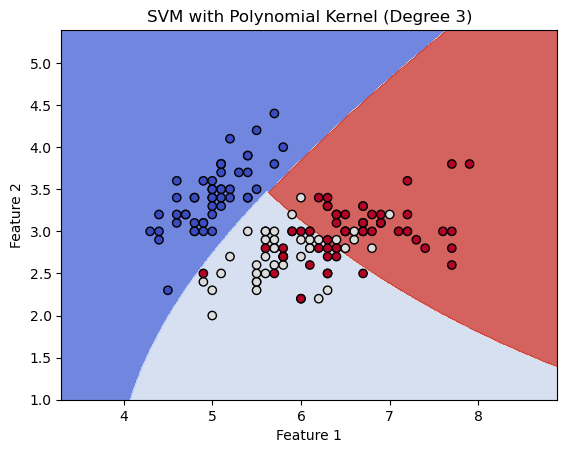

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset 
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a polynomial kernel
svm_classifier = SVC(kernel='poly')  

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel (Degree 3)')
plt.show()

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), the parameter ε (epsilon) is associated with the margin of the ε-insensitive tube or ε-tube. The ε-tube is a range around the predicted values where errors are tolerated and do not contribute to the loss function. It plays a crucial role in determining the number of support vectors and the model's flexibility. The relationship between ε and the number of support vectors is as follows:
1.
Larger ε (Wider ε-Tube):

Increasing the value of ε results in a wider ε-tube.
With a wider ε-tube, the SVR model allows for larger prediction errors before considering data points as support vectors.
As ε becomes larger, the model becomes more tolerant of errors and tends to have fewer support vectors.
Fewer support vectors result in a simpler model with potentially higher bias but lower va
r2.iance.
Smaller ε (Narrower ε-Tube):

Decreasing the value of ε results in a narrower ε-tube.
With a narrower ε-tube, the SVR model is less tolerant of errors and considers more data points as support vectors.
As ε becomes smaller, the model becomes less tolerant of errors and aims for a precise fit to the training data.
More support vectors result in a more complex model with potentially lower bias but higher variance.
The choice of ε in SVR determines the trade-off between model simplicity and precision. Larger ε values encourage a simpler model with fewer support vectors and higher bias, while smaller ε values lead to a more complex model with more support vectors and lower bias. The optimal value of ε depends on the specific problem, and it is often determined through cross-validation or grid search techniques to find the best trade-off between bias and variance for the given dataset.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

Support Vector Regression (SVR) is a powerful regression technique that relies on several hyperparameters to control its performance and flexibility. The choice of kernel function, C parameter, epsilon (ε) parameter, and gamma (γ) parameter can significantly impact the performance of an SVR model. Let's discuss each parameter and how it affects SVR:
1.
Kernel Function:

Role: The kernel function specifies the type of transformation applied to the input features. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.
Effect: The choice of the kernel function determines the model's ability to capture non-linear relationships in the data. Different kernel functions are suitable for different types of data and problem domains.
Example:
Use a linear kernel when you believe the relationship between features and the target variable is approximately linear.
Use an RBF kernel when you expect complex, non-linear relati
o2.nships.
C Parameter:

Role: The C parameter (regularization parameter) controls the trade-off between fitting the training data and maintaining a smooth decision boundary. It balances the margin width and the training error.
Effect:
Smaller C values result in a wider margin and a more tolerant model that may underfit.
Larger C values lead to a narrower margin, a less tolerant model, and potential overfitting to the training data.
Example:
Increase C when you want a more precise fit to the training data but be cautious of overfitting.
Decrease C when you want a more generalized model wit
h3. a wider margin.
Epsi

Role: Epsilon defines the size of the ε-tube around the regression line. Data points within this tube are not considered as errors.
Effect:
A larger ε allows for larger prediction errors and results in a more tolerant model with fewer support vectors.
A smaller ε makes the model less tolerant of errors and leads to more support vectors.
Example:
Increase ε when you want to allow for some level of noise or errors in your data.
Decrease ε when you want a more precise fit to the data and want to minimize deviations from the regression
 4.line.
Gamma (γ) Parameter:

Role: The gamma parameter is specific to certain kernel functions, such as RBF. It controls the shape of the kernel function and the influence of each training point.
Effect:
Smaller gamma values make the kernel function more spread out, resulting in a smoother decision boundary.
Larger gamma values make the kernel function more focused on individual data points, potentially leading to a more complex and wiggly decision boundary.
Example:
Increase gamma when you want the model to be sensitive to local variations in the data.
Decrease gamma when you want a more global view of the data and a smoother dec

Choosing appropriate values for these hyperparameters is crucial for building an effective SVR model. Hyperparameter tuning techniques, such as cross-validation and grid search, can help find the optimal combination of hyperparameter values for your specific dataset and problem. The choice of hyperparameters should be guided by a balance between model complexity, bias, and variance to achieve good generalization performance on unseen data.ision boundary.lon (ε) Parameter:

Q5. Assignment:*L Import the necessary libraries and load the dataseg*
L Split the dataset into training and testing set*
L Preprocess the data using any technique of your choice (e.g. scaling, normalizatio*K
L Create an instance of the SVC classifier and train it on the training d*tW
L Use the trained classifier to predict the labels of the testing *atW
L Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-*coreK
L Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCV to
improve its per*ormanc_
L Train the tuned classifier on the entir* dataseg
L Save the trained classifier to a file for future use.

Stroke Predicition Dataset

Dataset Source kaggle : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Context :

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Informa1.tion

id: unique ide2.ntifier
gender: "Male", "Female" or3. "Other"
age: age of th4.e patient
hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hy5.pertension
heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a he6.art disease
ever_married: "7.No" or "Yes"
work_type: "children", "Govt_jov", "Never_worked", "Private" or "S8.elf-employed"
Residence_type: "Rur9.al" or "Urban"
avg_glucose_level: average glucose10. level in blood
bmi:11. body mass index
smoking_status: "formerly smoked", "never smoked", "smok12.es" or "Unknown"*
stroke: 1 if the patient had a stroke or 0 if not

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
df = pd.read_csv("C:/Users/ajays/Downloads/archive/healthcare-dataset-stroke-data.csv")

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [17]:
for i in df.columns:
    print(i)
    print(f"\n {df[i].unique()} \n")

id

 [ 9046 51676 31112 ... 19723 37544 44679] 

gender

 ['Male' 'Female' 'Other'] 

age

 [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00

In [19]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [21]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [23]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [25]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

Observation :
Drop the id column as its of no further use
We will convert age to int
Gender ,work_type,smoking_status are categorical we will convert them to integral data type using encoding
In gender other category has only 1 row so we will replace the value with the mode ie,female

In [27]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [29]:
df.drop(['id'],axis=1,inplace = True)

In [31]:
df['age'] = df['age'].astype(int)

In [33]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [35]:
df.loc[3116,'gender'] = "Female"

In [37]:
df['gender'].value_counts()

gender
Female    2995
Male      2115
Name: count, dtype: int64

In [39]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Observation
We will replace bmi missing values with median

In [42]:
# Perform median imputation for the 'bmi' column
bmi_median = df['bmi'].median()
df['bmi'].fillna(bmi_median, inplace=True)

# Check if missing values have been filled
missing_values_after_imputation = df['bmi'].isnull().sum()

bmi_median, missing_values_after_imputation

C:\Users\ajays\AppData\Local\Temp\ipykernel_7372\1563478729.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_median, inplace=True)


(28.1, 0)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.215264,22.633866,0.00,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [46]:
df.dtypes

gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [48]:
num_columns = ["age","avg_glucose_level","bmi"]
cat_columns = ["gender","ever_married","work_type","Residence_type","smoking_status"]

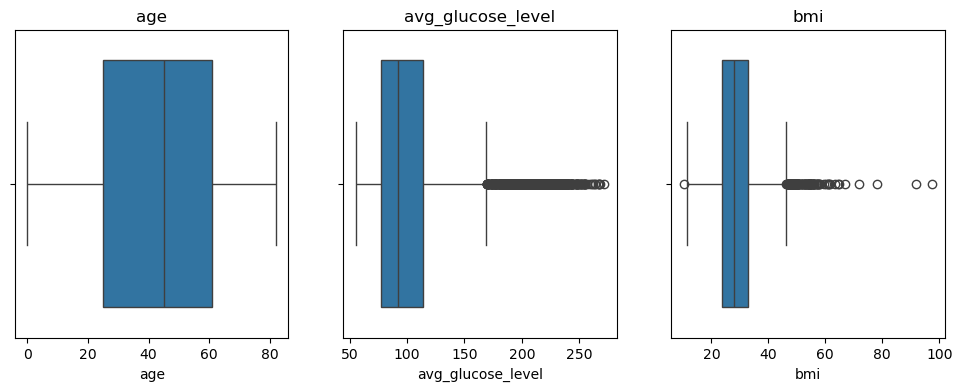

In [50]:
plt.figure(figsize=(12, 4))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=df[num_columns[i]])
    plt.title(num_columns[i])
plt.show()

In [52]:
def detect_outliers(data,column):
    q1 = df[column].quantile(.25)
    q3= df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    outlier = df.index[(df[column] <lower_bound) | (df[column] > upper_bound)]
    
    return outlier

In [54]:
index_list = []

for column in num_columns:
    index_list.extend(detect_outliers(df,column))

# remove duplicated indices in the index_list and sort it 
index_list = sorted(set(index_list))

In [56]:
before_remove = df.shape

df =df.drop(index_list)
after_remove = df.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (5110, 11)
Shape of data after remove : (4391, 11)


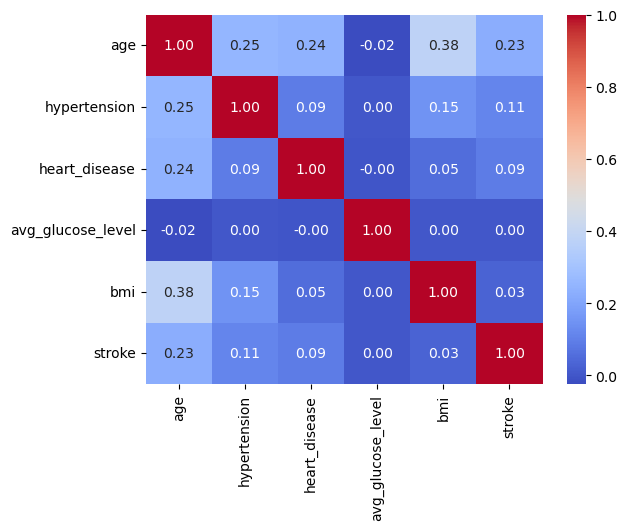

In [58]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Generate the heatmap with the numeric columns only
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


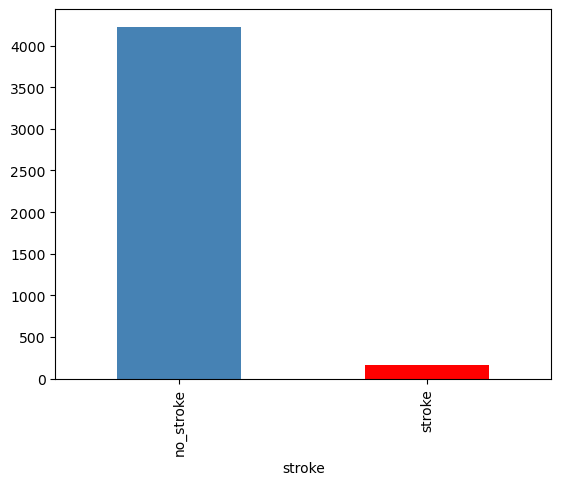

In [60]:
# Lets plot the count of output variable
df["stroke"].value_counts().plot(kind="bar",color=["steelblue","red"])
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

In [62]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Observation
There is a huge imbalance in the dataset
Converting the categorical to numerical data type

In [64]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns to encode
categorical_cols_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply LabelEncoder on categorical columns
for col in categorical_cols_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataframe to verify the encoding
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80,0,1,1,2,0,105.92,32.5,2,1
6,1,74,1,1,1,2,0,70.09,27.4,2,1
7,0,69,0,0,0,2,1,94.39,22.8,2,1
8,0,59,0,0,1,2,0,76.15,28.1,0,1
9,0,78,0,0,1,2,1,58.57,24.2,0,1


In [66]:
# Class count
count_class_0, count_class_1 = df['stroke'].value_counts()
print(count_class_0)
print(count_class_1)

# Divide by class
df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

4226
165


Random under-sampling:
stroke
0    165
1    165
Name: count, dtype: int64
Shape of the new dataset is (330, 11)



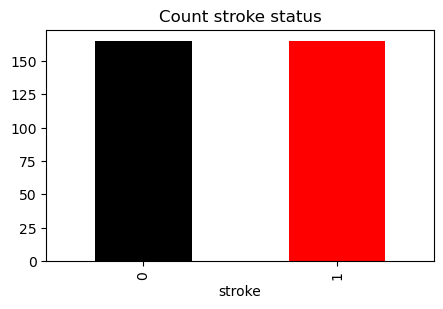

In [68]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['stroke'].value_counts())

plt.figure(figsize=(5, 3))
df_test_under['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {df_test_under.shape}\n")

Random under-sampling:
stroke
0    4226
1    4226
Name: count, dtype: int64
Shape of the new dataset is (8452, 11)



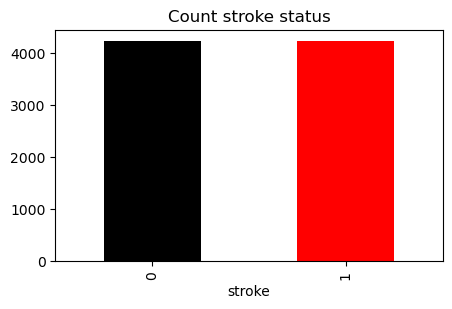

In [70]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random under-sampling:')
print(df_test_over['stroke'].value_counts())

plt.figure(figsize=(5, 3))
df_test_over['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {df_test_over.shape}\n")

In [72]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols_to_scale = ['age', 'avg_glucose_level', 'bmi']

# Apply scaling on numerical columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

# Display the first few rows of the dataframe to verify scaling
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,1.733521,0,1,1,2,0,0.637380,0.718712,2,1
6,1,1.467620,1,1,1,2,0,-0.943830,-0.058869,2,1
7,0,1.246037,0,0,0,2,1,0.128550,-0.760216,2,1
8,0,0.802869,0,0,1,2,0,-0.676397,0.047858,0,1
9,0,1.644887,0,0,1,2,1,-1.452218,-0.546762,0,1


In [74]:
from sklearn.model_selection import train_test_split

X = df_test_over.iloc[:,:-1]
y = df_test_over.stroke

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [76]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [78]:
y_pred = svc.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7690487458589683
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1057
           1       0.74      0.82      0.78      1056

    accuracy                           0.77      2113
   macro avg       0.77      0.77      0.77      2113
weighted avg       0.77      0.77      0.77      2113



<Axes: >

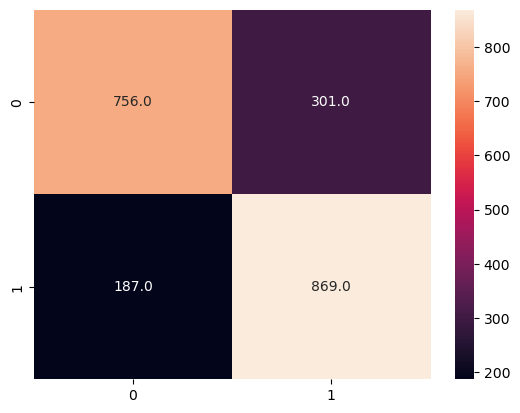

In [82]:
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot = True,fmt = '.1f')

In [84]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [86]:
clf=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,verbose=3)

In [ ]:
clf.fit(X_train,y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.796 total time=   2.8s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.772 total time=   2.5s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   2.1s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.796 total time=   2.5s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.772 total time=   2.6s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.750 total time=   2.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.796 total time=   2.4s
[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.772 total time=   2.4s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.750 total time=   1.8s
[CV 1/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.796 total time=   2.3s
[CV 2/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.772 total time=   2.5s
[CV 3/3] END .C=0.1, gamma=0.001, kernel=linear;

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
final = SVC(**clf.best_params_)

In [ ]:
y_pred = final.predict(X_test)

In [90]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1057
           1       0.74      0.82      0.78      1056

    accuracy                           0.77      2113
   macro avg       0.77      0.77      0.77      2113
weighted avg       0.77      0.77      0.77      2113

[[756 301]
 [187 869]]
0.7690487458589683


In [ ]:
import pickle
file = open('Model.pkl','wb')
pickle.dump(final,file)
file.close()
filee = open('Scaling.pkl','wb')
pickle.dump(scaler,filee)
filee.close()